# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report


# Load Dataset

In [ ]:
df = pd.read_csv(r"C:\Users\hp\Downloads\ML Project\data_email_campaign.csv")
df.head()


,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


# Data Cleaning

In [ ]:
print("Missing values before cleaning:\n", df.isnull().sum())

# Fill or drop missing values (depending on importance)
df.fillna(method='ffill', inplace=True) # Forward fill as a simple strategy

Missing values before cleaning:
 Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64


In [4]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

# Exploratory Data Analysis (EDA)

Univariate Analysis

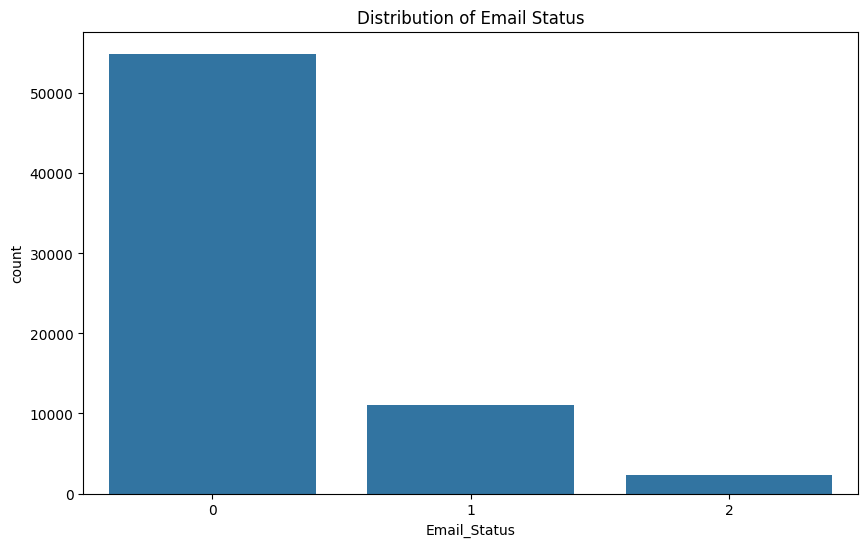

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='Email_Status', data=df)
plt.title("Distribution of Email Status")
plt.show()


Bivariate Analysis

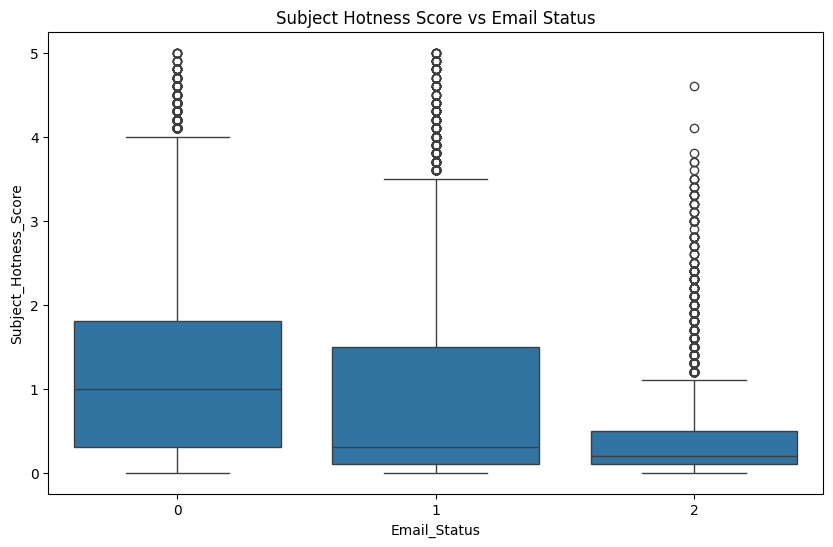

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Email_Status', y='Subject_Hotness_Score', data=df)
plt.title("Subject Hotness Score vs Email Status")
plt.show()


Multivariate Analysis

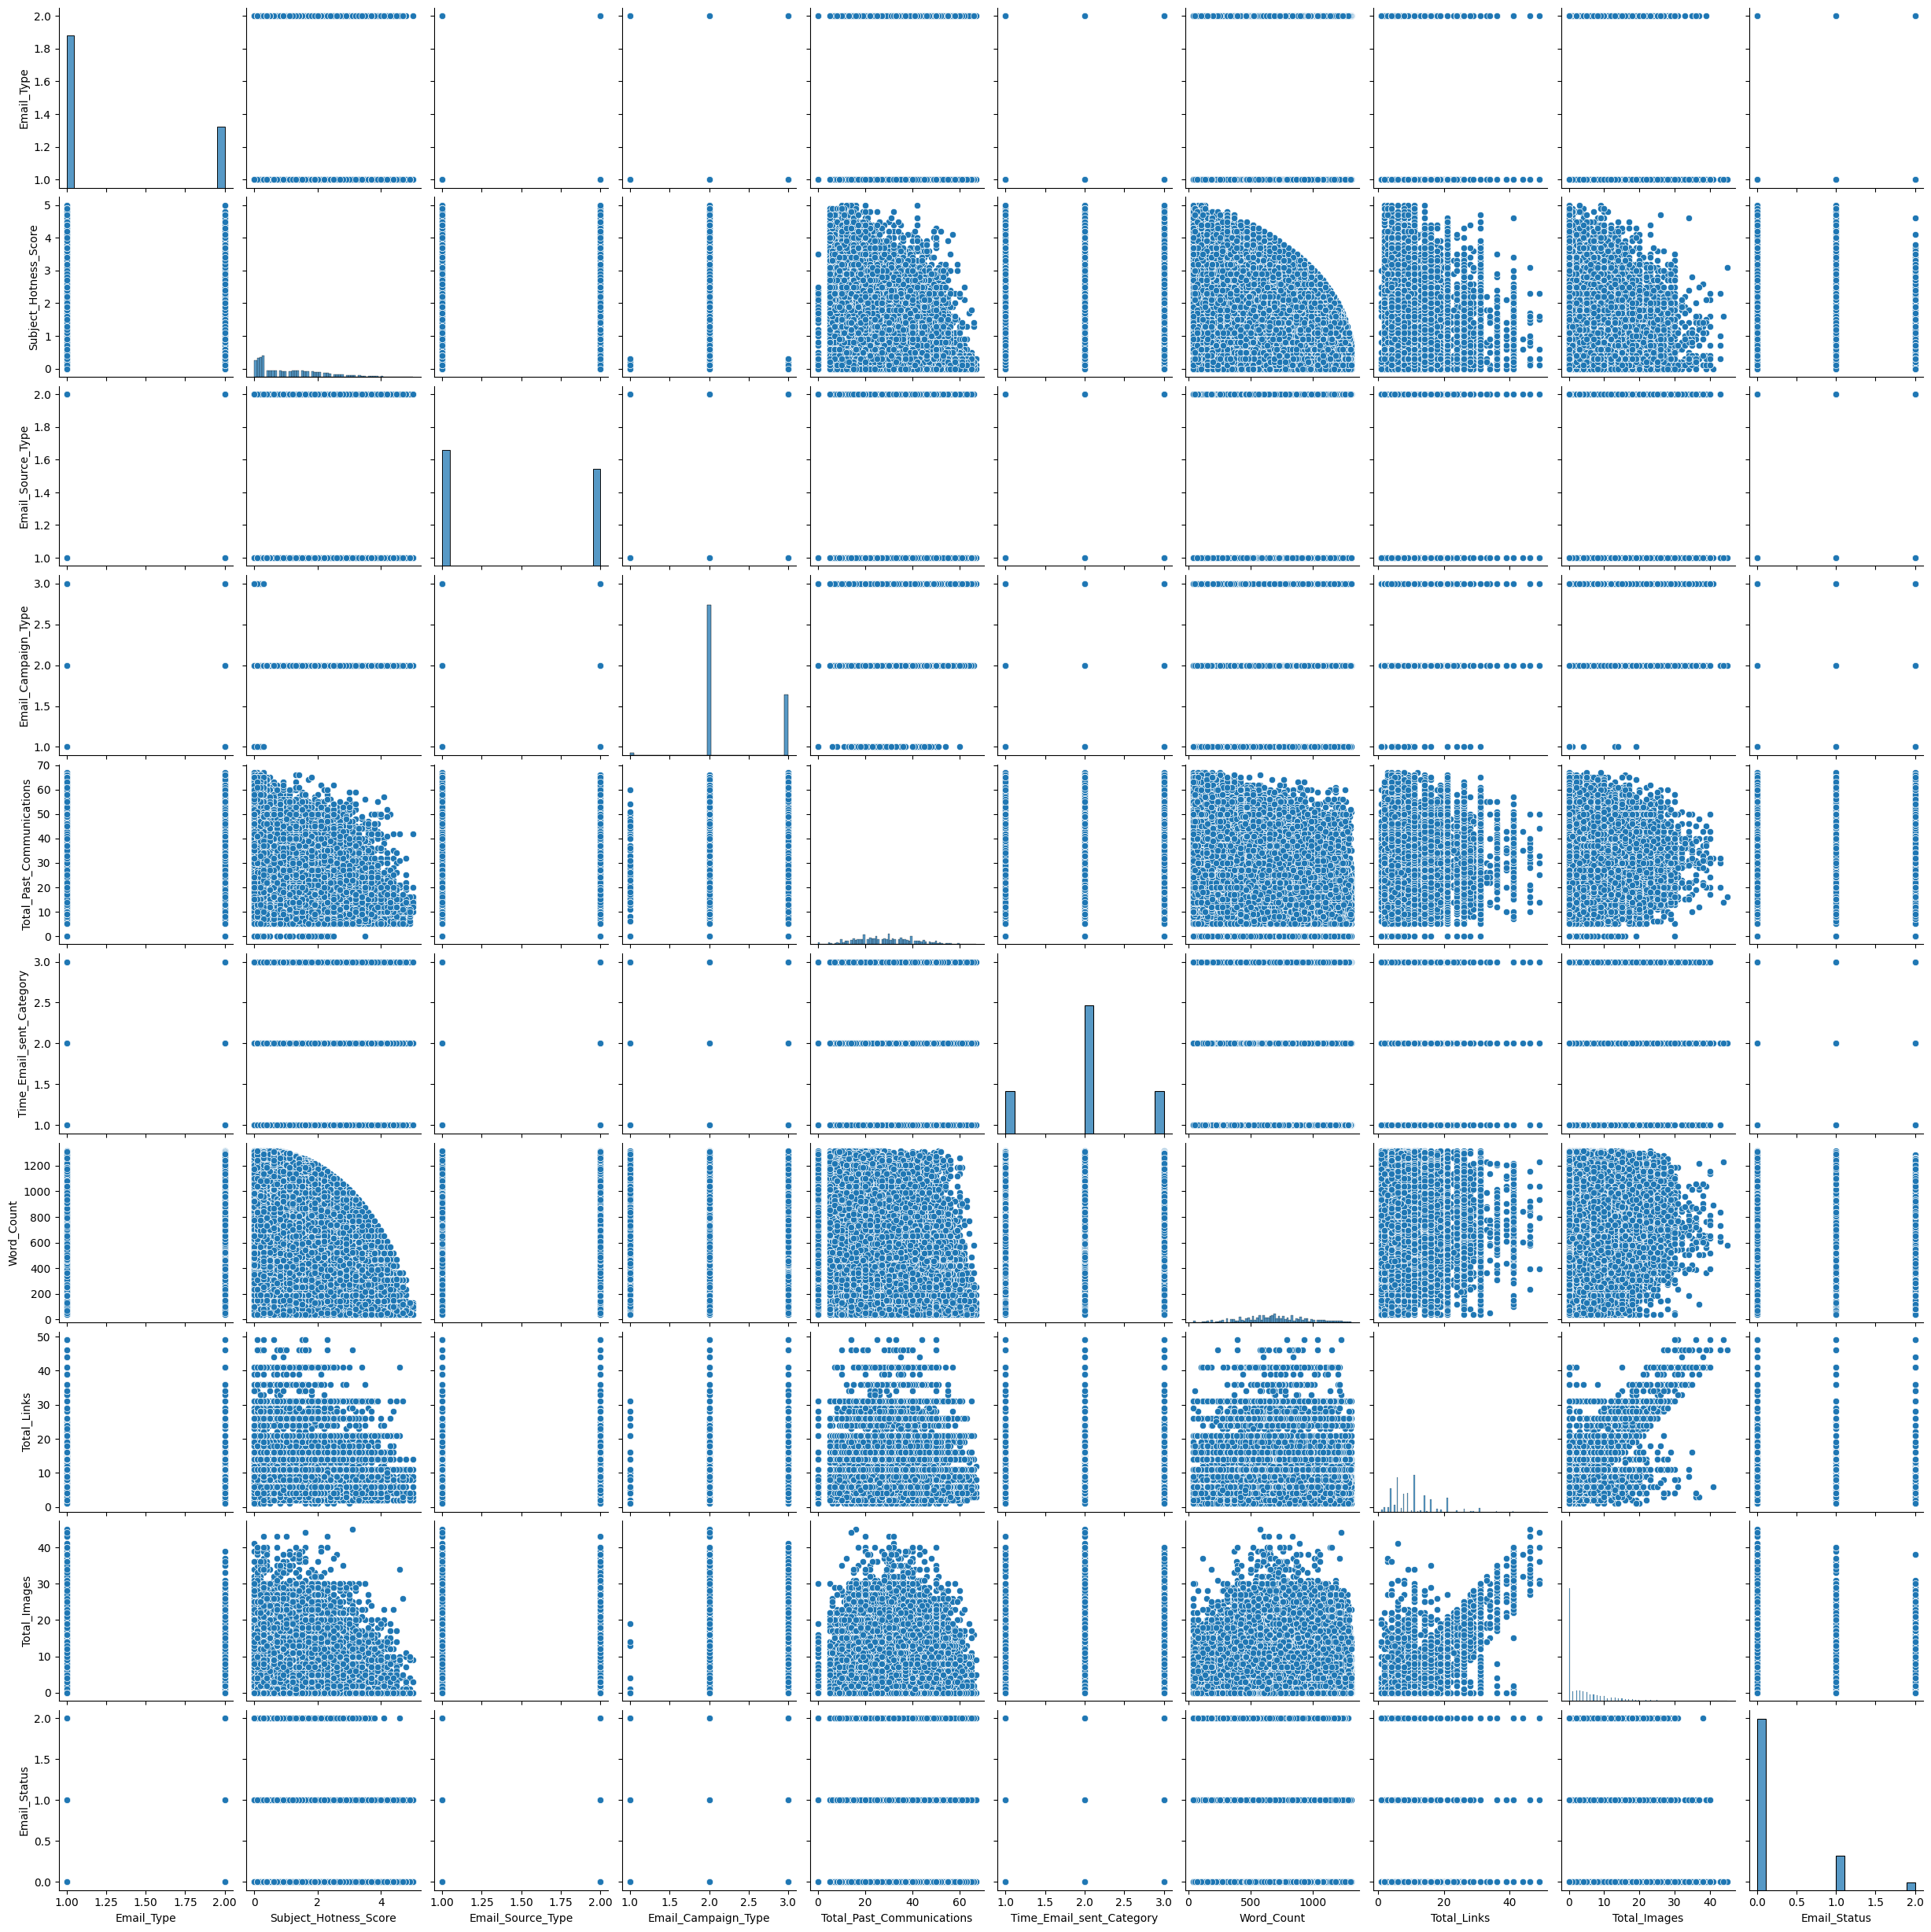

In [ ]:
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

# Correlation Analysis 

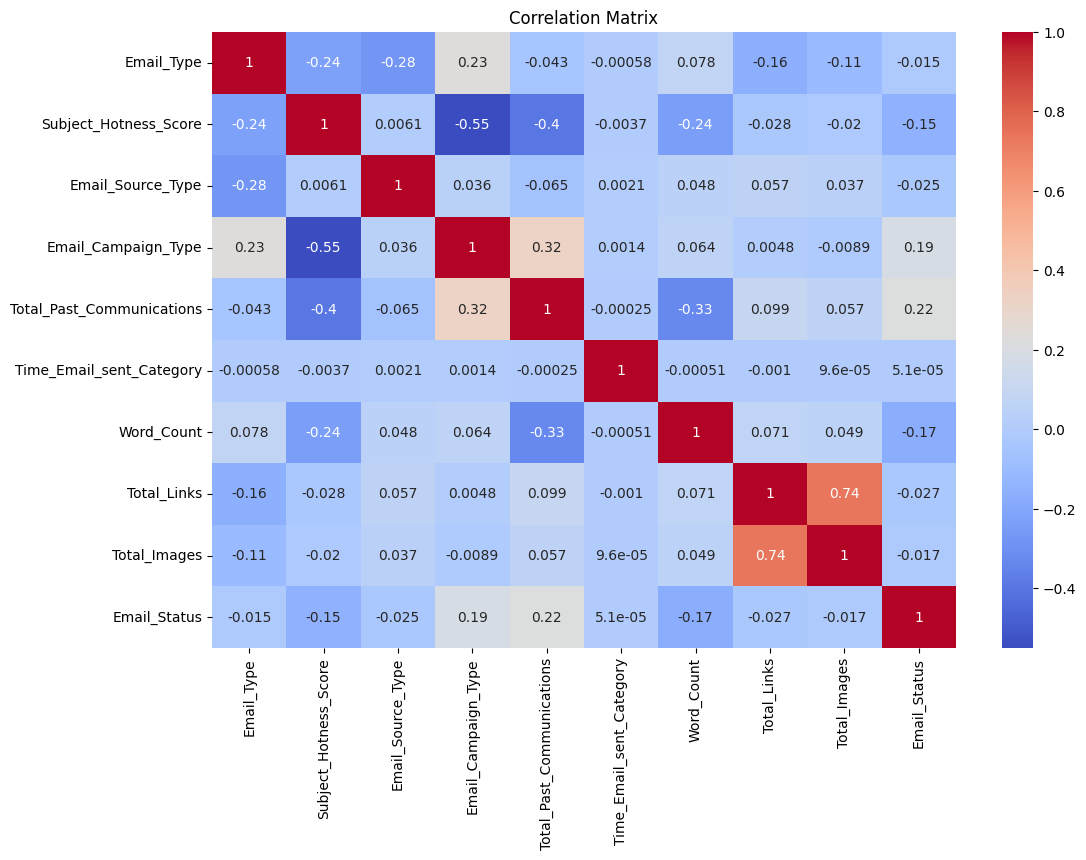

In [ ]:
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Outlier Treatment

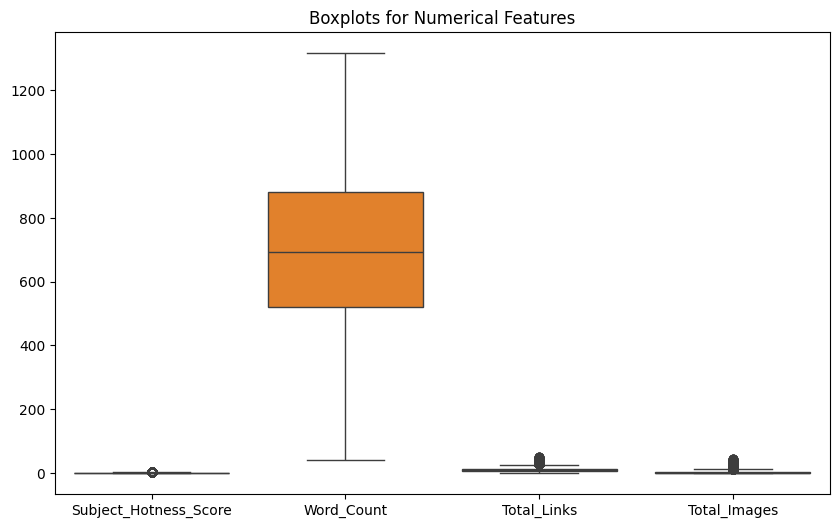

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['Subject_Hotness_Score', 'Word_Count', 'Total_Links', 'Total_Images']])
plt.title("Boxplots for Numerical Features")
plt.show()

# Check distributions & apply transformations if needed

In [ ]:
from scipy.stats import skew

numeric_cols = ['Subject_Hotness_Score', 'Word_Count', 'Total_Links', 'Total_Images']
for col in numeric_cols:
    print(f"Skewness for {col}: {skew(df[col])}")



Skewness for Subject_Hotness_Score: 0.8976826167024007
Skewness for Word_Count: 0.012805348013819265
Skewness for Total_Links: 1.3842816896138166
Skewness for Total_Images: 2.092359867728509


# Log Transform highly skewed data

In [ ]:
df['Word_Count'] = np.log1p(df['Word_Count'])

# Feature Engineering

In [ ]:
# Drop Email Id
df.drop('Email_ID', axis=1, inplace=True)

# One-hot encode categorical features
df = pd.get_dummies(df, columns=['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type', 'Customer_Location', 'Time_Email_sent_Category'], drop_first=True)

# Split Data

In [ ]:
X = df.drop('Email_Status', axis=1)
y = df['Email_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

In [16]:
# Standardize the features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Logistic Regression for multi-class classification
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)

# Train the model
log_reg.fit(X_train_scaled, y_train)




LogisticRegression(max_iter=500, multi_class='multinomial')

# Prediction & Evaluation

In [ ]:
y_pred_log = log_reg.predict(X_test_scaled)
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_log, zero_division=0))



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.82      0.98      0.90     10982
           1       0.52      0.14      0.22      2232
           2       0.00      0.00      0.00       457

    accuracy                           0.81     13671
   macro avg       0.45      0.37      0.37     13671
weighted avg       0.75      0.81      0.76     13671



# Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree Performance:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83     10982
           1       0.28      0.31      0.29      2232
           2       0.09      0.11      0.10       457

    accuracy                           0.71     13671
   macro avg       0.40      0.41      0.41     13671
weighted avg       0.73      0.71      0.72     13671



# Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Performance:")
print(classification_report(y_test, y_pred_rf))


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90     10982
           1       0.47      0.17      0.25      2232
           2       0.18      0.02      0.04       457

    accuracy                           0.81     13671
   macro avg       0.49      0.39      0.39     13671
weighted avg       0.75      0.81      0.76     13671



# K-Nearest Neighbors Classifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("\nKNN Performance:")
print(classification_report(y_test, y_pred_knn))


KNN Performance:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     10982
           1       0.40      0.19      0.26      2232
           2       0.17      0.02      0.04       457

    accuracy                           0.79     13671
   macro avg       0.47      0.39      0.40     13671
weighted avg       0.74      0.79      0.76     13671



# Support Vector Machine Classifier

In [ ]:
svm = SVC(kernel='rbf')  # You can also try 'linear' or 'poly' kernels if needed
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

print("\nSupport Vector Machine Performance:")
print(classification_report(y_test, y_pred_svm))

# Cross Validation for all models


In [ ]:
def cross_val(model, X, y):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    return np.mean(scores)

models = {'Logistic Regression': log_reg, 'Decision Tree': dt, 'Random Forest': rf, 'KNN': knn, 'SVM':svm}

for name, model in models.items():
    if name in ['Logistic Regression', 'KNN', 'SVM']:
        score = cross_val(model, X_train_scaled, y_train)
    else:
        score = cross_val(model, X_train, y_train)
    print(f"Cross-Validation Accuracy for {name}: {score:.4f}")

Cross-Validation Accuracy for Logistic Regression: 0.8098
Cross-Validation Accuracy for Decision Tree: 0.7103
Cross-Validation Accuracy for Random Forest: 0.8053
Cross-Validation Accuracy for KNN: 0.7927
Cross-Validation Accuracy for SVM: 0.8107


Conclusion:
Based on the results of our model evaluations:

Support Vector Machine (SVM) achieved the highest cross-validation accuracy of 81.07%, making it the best-performing model.

Logistic Regression followed closely with 80.98% accuracy, offering a simpler and highly effective alternative.

Random Forest also performed well with 80.53% accuracy, while K-Nearest Neighbors (KNN) achieved 79.27%.

Decision Tree had the lowest accuracy at 71.03%, indicating it may be prone to overfitting without further tuning.

Overall, SVM and Logistic Regression are the most suitable models for predicting email campaign responses based on the given dataset.